# PART 1# 

# New Section

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter, LinearSegmentedColormap
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model tuning
from sklearn.model_selection import GridSearchCV
# accuracy metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from utils import *

###Note that I couldn't use fucntions(train=X_train,test=X_test) wtih default values
## since in [utils.py] I couldn't import X_tarin,X_test from Report.ipynb

#timer
from timeit import default_timer as timer

# other
import sys
import warnings
from time import sleep

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
X,imgs, ids, names = load_faces()

In [5]:
print(X.shape)
print(X.dtype)

(1560, 5655)
float32


In [6]:
print(len(imgs))

1560


In [7]:
image_shape = imgs[0].shape
print(image_shape)

(87, 65)


In [8]:
print(names.shape)

(12,)


In [9]:
for name in names:
  print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Jacques Chirac
Jean Chretien
John Ashcroft
Junichiro Koizumi
Serena Williams
Tony Blair


The data contains pictures of famous people, The extracted dataset will only retain pictures of people that have at least min_faces_per_person(in our case 50)different pictures.The pics will be resized by 0.7 ratio, keeping the 3 RGB color channels. , X is the raw data of pixels expanded, imgs stands for the image data(87x65 shaped), ids shows the ids associated with each row of data(each row of X is the same image as of the same row of imgs data). Names is a list of the names of 12 renowned people and each stands in its id's posiition. 



---
we have 1560 images,5655 pixels=87x65(original features)


In [49]:
X_train, X_test, y_train, y_test,img_train, img_test = train_test_split(
    X, ids,imgs, test_size=0.25, random_state=42
)


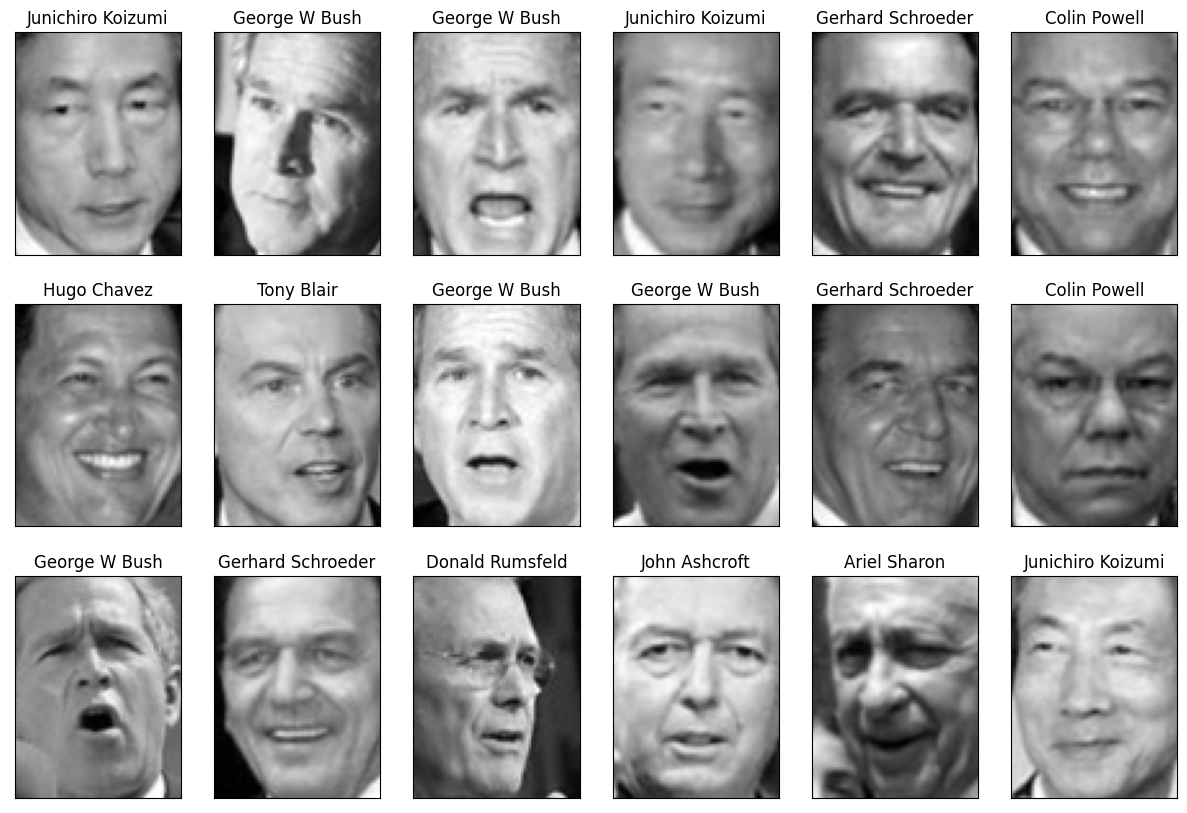

In [11]:
fig, axes = plt.subplots(3, 6, figsize=(15, 10),subplot_kw={'xticks': (), 'yticks': ()})

num_images = len(img_train)
random_indices = np.random.choice(num_images, 18, replace=False)

for index, ax in zip(random_indices, axes.ravel()):
    ax.imshow(img_train[index], cmap="gray")
    ax.set_title(names[y_train[index]])

18 imatges from the train dataset with the corresponding names

In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PART 2


In [14]:
 
X_pca, _, pca = PCA_(X_train,X_test)  #everywhere I had to use X_train, X_test as explained above

X_train_pca.shape: (1170, 1170)


In [15]:
print(X_train.shape)

(1170, 5655)


since the number of components is picked to be ***min(n_samples, n_features)***, n_samples for X_train is 1170 < 5655, so X_pca is an 1170x1170 matrix

In [16]:
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

(1170, 5655)


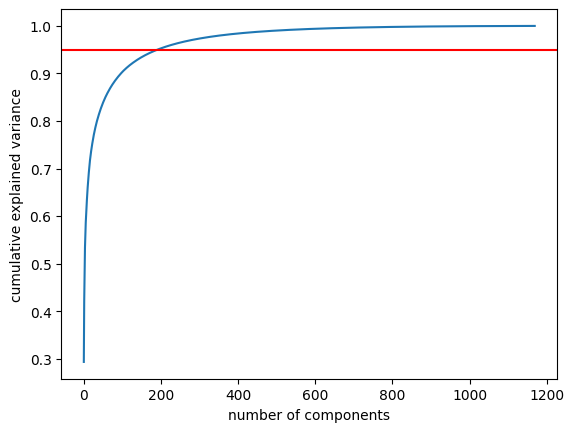

In [17]:

plt.plot(cumulative_explained_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-')
print(pca.components_.shape) 

each of the 1170 components **themesleves** have a 5655-D representation. 

---


 approximately 200 components are enough to explain 0.95% of the total variance of the data


In [18]:
print(ids.shape)
u,c = np.unique(ids,return_counts = True)
print(u)
print(c) # we have 77 occurences of id 0, 236 occurences of id 1,...etc...(each is corresponds to one person only, in target_names there are 12 people names)
# the labels are moderately balanced 

(1560,)
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 77 236 121 530 109  71  52  55  53  60  52 144]


In [20]:
X_pca200,_, pca200 = PCA_(X_train,X_test,n_comp=200)


X_train_pca.shape: (1170, 200)


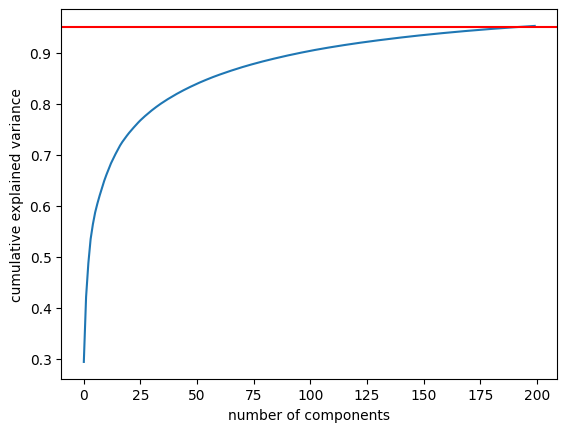

In [21]:
explained_variance_ratios = pca200.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)

# print(explained_variance_ratios.shape)
# print("\n")
# print(cumulative_explained_variance.shape)

plt.plot(cumulative_explained_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.show()

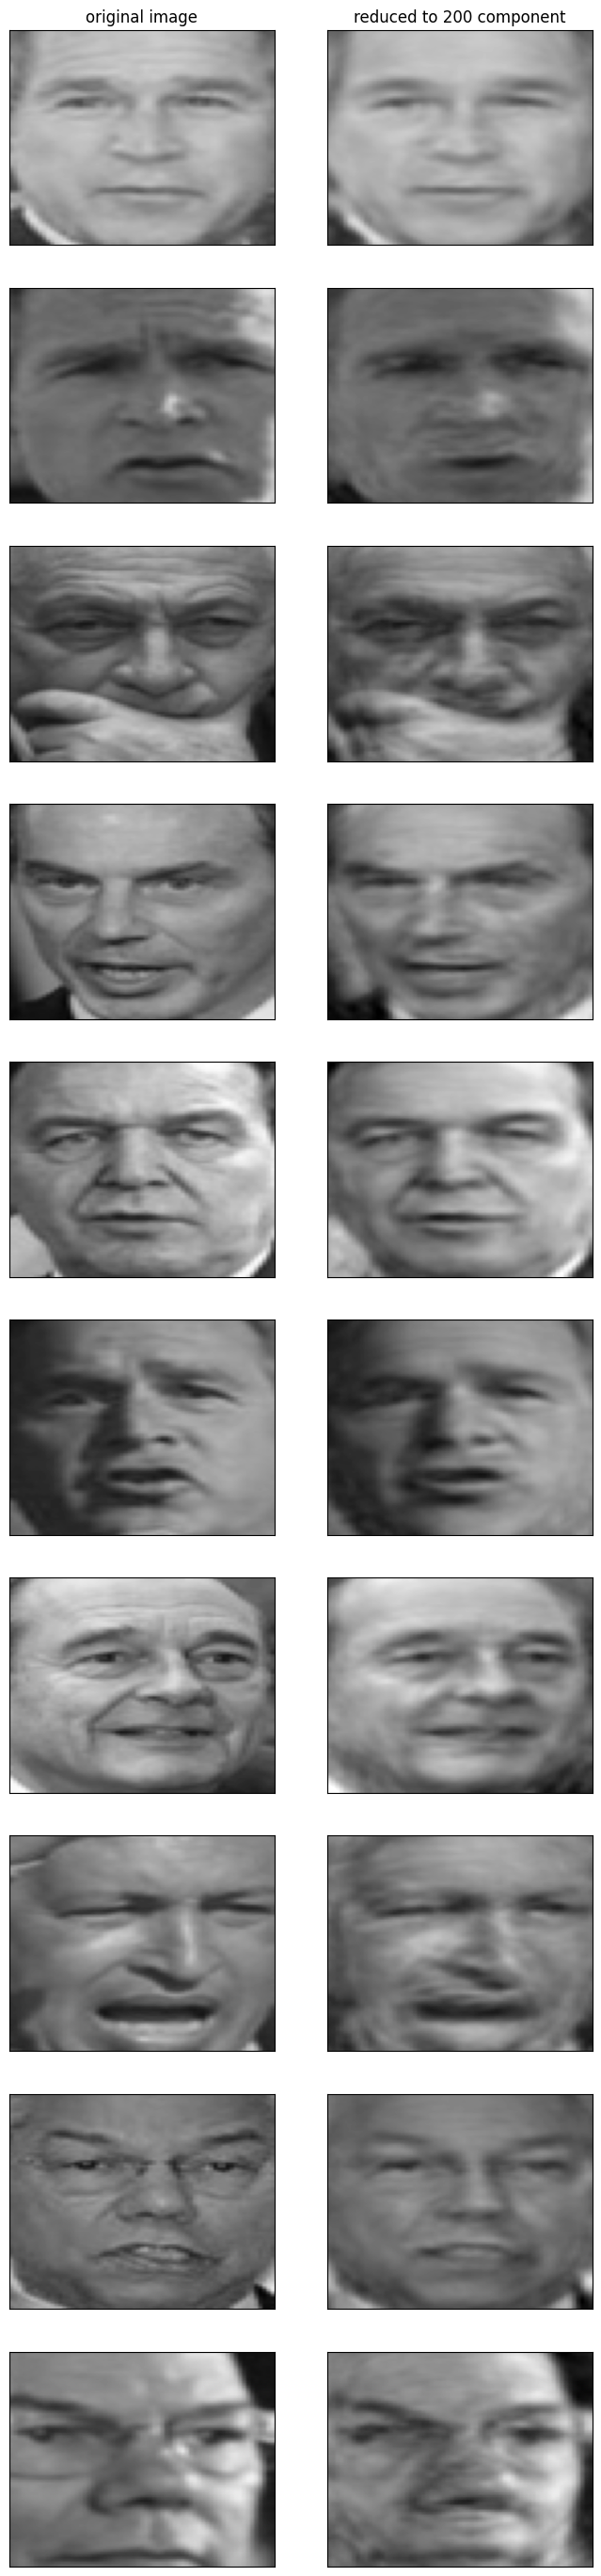

In [46]:
plot_pca_faces(X_train, image_shape, 200)

to the left-original images, right-retrieved from reducing to 200D and then inversing back, we see no huge differences, as we see truly a huge portion of the data variance is restored in case of 200=n_components ( we see that some wrinkles on foreheads or facial expression, shade details are not restored, but facial features, significant information is restored)

# PART 3


#DecisiontreeClassifier (part 3 is done properly with RandomForestClassifier following this part)

In [50]:

X_pcaDT,X_tstDT,pcaDT = PCA_(n_comp=200)

X_train_pca.shape: (1170, 20)


In [51]:
DTR = DecisionTreeClassifier()

In [52]:
param_grid = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [4, 8,10,12]
}

In [53]:
CV_dtr = GridSearchCV(estimator=DTR, param_grid=param_grid, cv=5)

In [54]:
CV_dtr.fit(X_pcaDT, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 10, 12]})

In [55]:
print(CV_dtr.best_params_)  #best model : {'criterion': 'gini', 'max_depth': 4}

{'criterion': 'gini', 'max_depth': 4}


In [57]:
pred=CV_dtr.predict(X_tstDT)

In [58]:
cm = confusion_matrix(y_test, pred)

In [59]:
col = []
ind = []
for name in names:
  col.append(name+"_pred")
  ind.append(name+"_actual")

In [60]:
performance = pd.DataFrame(cm, columns=col,index=ind)

In [61]:
precision = []
for i in range(performance.shape[0]):
    temp = performance.iloc[i, i] / performance.iloc[i, ].sum()
    precision.append(temp)

In [62]:
performance["Precision_score"] = precision


In [63]:
print(performance.head())

                          Ariel Sharon_pred  Colin Powell_pred  \
Ariel Sharon_actual                       0                  8   
Colin Powell_actual                       0                 26   
Donald Rumsfeld_actual                    0                  4   
George W Bush_actual                      0                 10   
Gerhard Schroeder_actual                  0                  2   

                          Donald Rumsfeld_pred  George W Bush_pred  \
Ariel Sharon_actual                          1                   6   
Colin Powell_actual                          1                  27   
Donald Rumsfeld_actual                       8                  13   
George W Bush_actual                         0                 115   
Gerhard Schroeder_actual                     2                  17   

                          Gerhard Schroeder_pred  Hugo Chavez_pred  \
Ariel Sharon_actual                            0                 0   
Colin Powell_actual                       

the highest precision is for George Bush's pics,then Colin Powell, altough Bush's pics are not the most dominating in the dataset

In [64]:
print("Accuracy for Decision Tree on face data: ",accuracy_score(y_test, pred))  # 0.4282051282051282

Accuracy for Decision Tree on face data:  0.4282051282051282


# RandomForestClassifier

In [22]:
RFC = RandomForestClassifier()

param_grid = {
    'max_features': ['auto'],
    'max_depth': [ 5,  8, 10],
    'criterion': ['gini', 'entropy']
}

In [23]:
CV_rfc = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=4, n_jobs=-1,verbose=1)  # by default scoring is None, 

In [51]:
(X_pcaRfc, X_tst_pcaRfc, pca200) = PCA_(X_train,X_test,n_comp=200)

X_train_pca.shape: (1170, 200)


do the PCA transformation obtained from the train set seperately on test set to bring them to the same space.

In [52]:
CV_rfc.fit(X_pcaRfc, y_train)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 10], 'max_features': ['auto']},
             verbose=1)

In [53]:
CV_rfc.best_params_   # {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto'}

In [54]:
rfc_opt = RandomForestClassifier(criterion = CV_rfc.best_params_["criterion"], max_depth = CV_rfc.best_params_["max_depth"], max_features = CV_rfc.best_params_["max_features"])

In [55]:
train_time = model_duration(rfc_opt,X_pcaRfc, X_tst_pcaRfc,y_train,inference = False)
mean_inference_time =  model_duration(rfc_opt, X_pcaRfc, X_tst_pcaRfc,y_train)
print(train_time, mean_inference_time)

2.5311537999950815 0.0393601139987004


 **200COMPONENTS** <br>
<br> 
at first it was (6.552928399993107  scnds,   0.12033205500047188  scnds) but then became *** (2.5311537999950815 , 0.0393601139987004) ***<br>
 0.4846153846153846 f1 score for the test data <br>
0.9931623931623932f1 score for the train data
<br>
overfitting



(***`6.552928399993107`*** seconds, ***`0.12033205500047188`***seconds), obviously training stage took much longer time than the inference. I excluded model initialization part since it was very fast(just calling a constructor with predefined params is not a delay)

In [57]:
pred = rfc_opt.predict(X_tst_pcaRfc)
print(f1_score(y_test,pred,average="micro"))
print(f1_score(y_train,rfc_opt.predict(X_pcaRfc),average="micro"))

0.48205128205128206
0.9931623931623932


In [76]:
# cf = confusion_matrix(y_test, pred)
# print(cf)


[[  0   3   0  13   0   0   0   0   0   0   0   0]
 [  0  33   0  33   0   0   0   0   0   0   0   0]
 [  0   1   2  24   0   0   0   0   0   0   0   0]
 [  0   1   0 139   0   0   0   0   0   0   0   0]
 [  0   1   0  23   0   0   0   0   0   0   0   0]
 [  0   2   0  14   0   0   0   0   0   0   0   1]
 [  0   1   0   8   1   0   0   0   0   0   0   0]
 [  0   2   1  11   0   0   0   0   0   0   0   0]
 [  0   1   0  15   0   0   0   0   0   0   0   0]
 [  0   1   0   8   0   0   0   0   0   2   0   0]
 [  0   0   0   7   0   0   0   0   0   0   2   0]
 [  0   1   0  37   0   0   0   0   0   0   0   2]]


#PART 4-5

In [58]:
X_pca400, X_tst_pca400,_ = PCA_(X_train, X_test, n_comp=400)
X_pca50, X_tst_pca50,_ = PCA_(X_train, X_test, n_comp=50)
X_pca_None, X_tst_None,_ = PCA_(X_train, X_test)  # again due to min(n_samples, n_fetaures), n_samples is smaller, so n_comp=n_samples in the train set

X_train_pca.shape: (1170, 400)
X_train_pca.shape: (1170, 50)
X_train_pca.shape: (1170, 1170)


In [59]:
train_time = model_duration(rfc_opt,X_pca400, X_tst_pca400,y_train,inference = False)
mean_inference_time =  model_duration(rfc_opt, X_pca400, X_tst_pca400,y_train)
print(train_time, mean_inference_time)

pred = rfc_opt.predict(X_tst_pca400)
f1 = f1_score(y_test,pred,average="micro")
acc = accuracy_score(y_test, pred)
print("f1 for Random Forest on face data,comp=400: TEST ",f1) # averaged F1 score is said to be a good perform measure in case of multilabel classification
# since it is the harmonic mean of the precision and recall, it tries to optimize both the recall & precision

#(we want to increase the correct predicted pictures among pics of each and every person(precision) 
#and  if it is George Bush, we want to increase the chance of predicting it as George Bush (recall))
print("accuracy for Random Forest on face data,comp=400: TEST",acc)

print("\n\n\n")

pred = rfc_opt.predict(X_pca400)
f1 = f1_score(y_train,pred,average="micro")
acc = accuracy_score(y_train, pred)
print("f1 for Random Forest on face data,comp=400: TRAIN ",f1)
print("accuracy for Random Forest on face data,comp=400: TRAIN",acc)

4.274787000002107 0.04484060399961891
f1 for Random Forest on face data,comp=400: TEST  0.43076923076923074
accuracy for Random Forest on face data,comp=400: TEST 0.4307692307692308




f1 for Random Forest on face data,comp=400: TRAIN  0.9923076923076923
accuracy for Random Forest on face data,comp=400: TRAIN 0.9923076923076923


**400 components** <br>
(9.473773400008213scnds, 0.11225945000012871scnds) <br>

**test data** <br>
f1 for Random Forest on face data,comp=400:  0.4230769230769231 <br>
accuracy for Random Forest on face data,comp=400: 0.4230769230769231 <br>



**train data**
f1 for Random Forest on face data,comp=400: TRAIN  0.9931623931623932 <br>
accuracy for Random Forest on face data,comp=400: TRAIN 0.9931623931623932<br>

In [61]:
train_time = model_duration(rfc_opt,X_pca50, X_tst_pca50,y_train,inference = False)
mean_inference_time =  model_duration(rfc_opt, X_pca50, X_tst_pca50,y_train)
print(train_time, mean_inference_time)

pred = rfc_opt.predict(X_tst_pca50)
f1 = f1_score(y_test,pred,average="micro")
acc = accuracy_score(y_test, pred)
print("f1 for Random Forest on face data,comp=50: TEST ",f1) # averaged F1 score is said to be a good perform measure in case of multilabel classification
# since it is the harmonic mean of the precision and recall, it tries to optimize both the recall & precision

#(we want to increase the correct predicted pictures among pics of each and every person(precision) 
#and  if it is George Bush, we want to increase the chance of predicting it as George Bush (recall))
print("accuracy for Random Forest on face data,comp=50: TEST",acc)

print("\n\n\n")

pred = rfc_opt.predict(X_pca50)
f1 = f1_score(y_train,pred,average="micro")
acc = accuracy_score(y_train, pred)
print("f1 for Random Forest on face data,comp=50: TRAIN ",f1)
print("accuracy for Random Forest on face data,comp=50: TRAIN",acc)

1.2699587999959476 0.035464153999346305
f1 for Random Forest on face data,comp=50: TEST  0.5769230769230769
accuracy for Random Forest on face data,comp=50: TEST 0.5769230769230769




f1 for Random Forest on face data,comp=50: TRAIN  0.9957264957264957
accuracy for Random Forest on face data,comp=50: TRAIN 0.9957264957264957


**50 components** <br>
(3.3929997000086587scnds, 0.11350997400004417scnds) <br>

**test data** <br>
f1 for Random Forest on face data,comp=50: TEST  0.5487179487179488 <br>
accuracy for Random Forest on face data,comp=50: TEST 0.5487179487179488<br>



**train data**
f1 for Random Forest on face data,comp=50: TRAIN  0.9957264957264957 <br>
accuracy for Random Forest on face data,comp=50: TRAIN 0.9957264957264957

In [60]:
train_time = model_duration(rfc_opt,X_pca_None, X_tst_None,y_train,inference = False)
mean_inference_time =  model_duration(rfc_opt,X_pca_None, X_tst_None,y_train)
print(train_time, mean_inference_time)

pred = rfc_opt.predict(X_tst_None)
f1 = f1_score(y_test,pred,average="micro")
acc = accuracy_score(y_test, pred)
print("f1 for Random Forest on face data,comp=FULL: TEST ",f1) # averaged F1 score is said to be a good perform measure in case of multilabel classification
# since it is the harmonic mean of the precision and recall, it tries to optimize both the recall & precision

#(we want to increase the correct predicted pictures among pics of each and every person(precision) 
#and  if it is George Bush, we want to increase the chance of predicting it as George Bush (recall))
# print("accuracy for Random Forest on face data,comp=FULL: TEST",acc)

print("\n\n\n")

pred = rfc_opt.predict(X_pca_None)
f1 = f1_score(y_train,pred,average="micro")
acc = accuracy_score(y_train, pred)
print("f1 for Random Forest on face data,comp=FULL: TRAIN ",f1)
# print("accuracy for Random Forest on face data,comp=50: TRAIN",acc)

6.718161900003906 0.046551038000616246
f1 for Random Forest on face data,comp=FULL: TEST  0.36923076923076925




f1 for Random Forest on face data,comp=FULL: TRAIN  0.9914529914529915


**FULL components** <br>
(7.23153740001726 SCNDS,  0.0623193339977297 scnds) <br>

**test data** <br>
f1 for Random Forest on face data,comp=FULL: TEST  0.3615384615384615 <br> <br>



**train data**
f1 for Random Forest on face data,comp=FULL: TRAIN  0.9880341880341881

### ***SUMMARY OF THE REPORT/ CONCLUSION***

SO, comparing the 200, 400,50 and FULL component PCA versions on a simple RFC model tuned with a simple GridSearcgCV , I concluded that , the more we increase # of componenets, the **more** the training duration and **less** the inference duration(since more components make the model training and learnign a computationally heavy procedure , at the cost of which it becomes reletively easier and faster to infer) become.  

Next, I don't know why but the more components we have , the less the F1 score for the test data gets, so if we increase the component amount, the model starts performing poorly in the real world- the best being 50 component model in terms of F1 score

The, regarding the F1 score on the train data, the more the components, (despite for compoenne #=400) the more the training F1 score, so it becomes mor likely to overfit since the model has learnt on more intricate, multdimensional and high variance data.

so i think the bets model is with 400components sicne its test and train f1s are very close to each otehr, so no overfitting, it is of mediocre duration, not so high dimensional and not so low dimensional as 50, explains the variance pretty well.